# **SLIDING WINDOW TECHNIQUE**

Like two pointers, sliding windows work the same with arrays and strings - the important thing is that they're iterables with ordered elements. For the sake of brevity, the first part of this article up until the examples will be focusing on arrays. However, all the logic is identical for strings.

Sliding window is another common approach to solving problems related to arrays. A sliding window is actually implemented using two pointers! Before we start, we need to talk about the concept of a **subarray**.

## Subarrays

Given an array, a **subarray** is a contiguous section of the array. All the elements must be adjacent to each other in the original array and in their original order. For example, with the array `[1, 2, 3, 4]`, the subarrays (grouped by length) are:

1.    [1], [2], [3], [4]
2.    [1, 2], [2, 3], [3, 4]
3.    [1, 2, 3], [2, 3, 4]
4.    [1, 2, 3, 4]


**A subarray can be defined by two indices, the start and end.** For example, with `[1, 2, 3, 4]`, the subarray `[2, 3]` has a starting index of 1 and an ending index of 2. Let's call the starting index the left bound and the ending index the right bound. Another name for subarray in this context is "window".

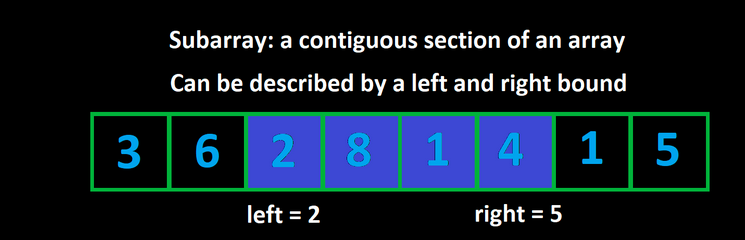


## When should we use sliding window?

There is a very common group of problems involving subarrays that can be solved efficiently with sliding window. Let's talk about how to identify these problems.

**First**, the problem will either explicitly or implicitly define criteria that make a subarray "valid". There are 2 components regarding what makes a subarray valid:

*    A constraint metric. This is some attribute of a subarray. It could be the sum, the number of unique elements, the frequency of a specific element, or any other attribute.
*    A numeric restriction on the constraint metric. This is what the constraint metric should be for a subarray to be considered valid.

For example, let's say a problem declares a subarray is valid if it has a sum less than or equal to 10. The constraint metric here is the sum of the subarray, and the numeric restriction is <= 10. A subarray is considered valid if its constraint metric conforms to the numeric restriction, i.e. the sum is less than or equal to 10.

**Second**, the problem will ask you to find valid subarrays in some way.

*    The most common task you will see is finding the best valid subarray. The problem will define what makes a subarray better than another. For example, a problem might ask you to find the longest valid subarray.

*    Another common task is finding the number of valid subarrays. We will take a look at this later in the article.

*    Whenever a problem description talks about subarrays, you should figure out if sliding window is a good option by analyzing the problem description. If you can find the things mentioned above, then it's a good bet.

Here is a preview of some of the example problems that we will look at in this article, to help you better understand what sliding window problems look like:

*    Find the longest subarray with a sum less than or equal to k
*    Find the longest substring that has at most one "0"
*    Find the number of subarrays that have a product less than k


## The algorithm

The idea behind a sliding window is to consider **only** valid subarrays. Recall that a subarray can be defined by a left bound (the index of the first element) and a right bound (the index of the last element). In sliding window, we maintain two variables `left` and `right`, which at any given time represent the current subarray under consideration.

Initially, we have `left = right = 0`, which means that the first subarray we look at is just the first element of the array on its own. We want to expand the size of our "window", and we do that by incrementing `right`. When we increment `right`, this is like "adding" a new element to our window.

But what if after adding a new element, the subarray becomes invalid? We need to "remove" some elements from our window until it becomes valid again. To "remove" elements, we can increment `left`, which shrinks our window.

As we add and remove elements, we are "sliding" our window along the input from left to right. The window's size is constantly changing - it grows as large as it can until it's invalid, and then it shrinks. However, it always slides along to the right, until we reach the end of the input.

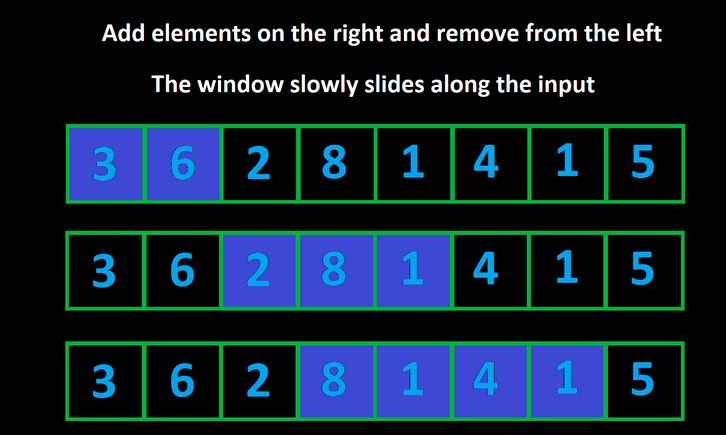

To explain why this algorithm works, let's look at a specific example. Let's say that we are given a positive integer array `nums` and an integer `k`. We need to find the length of the longest subarray that has a sum less than or equal to `k`. For this example, let `nums = [3, 2, 1, 3, 1, 1]` and `k = 5`.

Initialliy, we have `left = right = 0`, so our window is only the first element: `[3]`. Now, let's expand to the right until the constraint is broken. This will occur when `left = 0, right = 2`, and our window is: `[3, 2, 1]`. The sum here is `6`, which is greater than `k`. We must now shrink the window from the left until the constraint is no longer broken. After removing one element, the window becomes valid again: `[2, 1]`.

Why is it correct to remove this `3` and forget about it for the rest of the algorithm? Because the input only has positive integers, a longer subarray directly equals a larger sum. We know that `[3, 2, 1]` already results in a sum that is too large. There is no way for us to ever have a valid window again if we keep this `3` because if we were to add any more elements from the right, the sum would only get larger. That's why we can forget about the `3` for the rest of the algorithm.

## Implementation

Now that you have an idea of how sliding window works, let's talk about how to implement it. For this section, we will use the previous example (find the longest subarray with a sum less than or equal to `k`).

As described above, we need to identify a **constraint metric**. In our example, the constraint metric is the sum of the window. How do we keep track of the sum of the window as elements are added and removed? One way that we could do it is by keeping the window in a separate array. When we add elements from the right, we add them to our array. When we remove elements from the left, we remove the corresponding elements from the array. This way, we can always find the sum of our current window just by summing the elements in the separate array.

This is very inefficient as removing elements and finding the sum of the window will be **O(n)** operations. How can we do better?

We don't actually need to store the window in a separate array. All we need is some variable, let's call it `curr`, that keeps track of the current sum. When we add a new element from the right, we just do `curr += nums[right]`. When we remove an element from the left, we just do `curr -= nums[left]`. This way, all operations are done in `O(1)`.

Next, how do we move the pointers `left` and `right`? Remember, we want to keep expanding our window, and the window always slides to the right - it just might shrink a few times in between. Because right is always moving forward, we can use a for loop to iterate right over the input. In each iteration of the for loop, we will be adding the element nums[right] to our window.

**What about `left`?** When we move `left`, we are shrinking our window. We only shrink our window when it becomes invalid. By maintaining `curr`, we can easily tell if the current window is valid by checking the condition `curr <= k`. When we add a new element and the window becomes invalid, we may need to remove multiple elements from the left. For example, let's say `nums = [1, 1, 1, 3]` and `k = 3`. When we arrive at the 3 and add it to the window, the window becomes invalid. We need to remove three elements from the left before the window becomes valid again.

This suggests that we should use a while loop to perform the removals. The condition will be `while (curr > k)` (while the window is invalid). To perform the removals, we do `curr -= nums[left]` and then increment `left` in each iteration of the while loop.

**Finally, how do we update the answer?** In each for loop iteration, after the while loop, the current window is valid. We can write code here to update the answer. The formula for the length of a window is `right - left + 1`.

Here's some pseudocode that puts it all together:

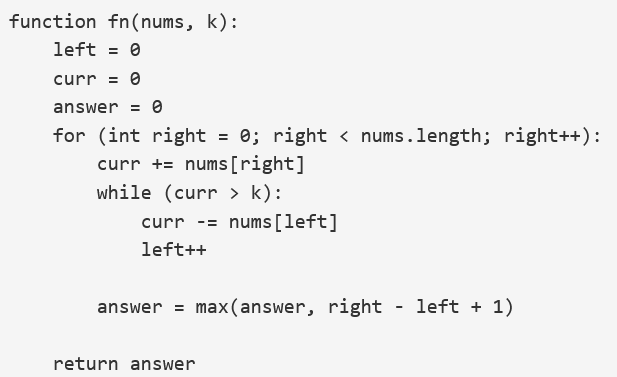


**Here's some pseudocode for a general template:**
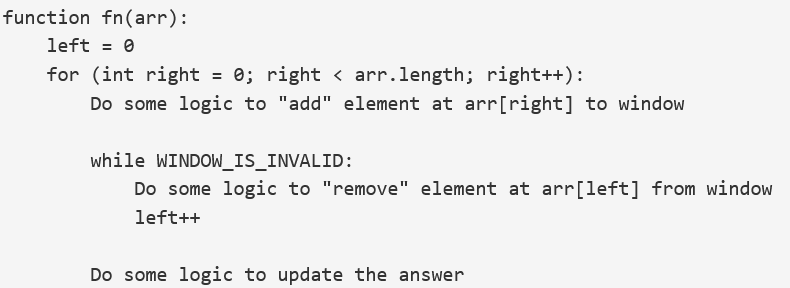


**Why is sliding window efficient?**

For any array, how many subarrays are there? If the array has a length of `n`, there are `n` subarrays of length `1`. Then there are `n - 1` subarrays of length `2` (every index except the last one can be a starting index), `n - 2` subarrays of length `3` and so on until there is only `1` subarray of length `n`. This means there are: 

**∑k=1nk=n⋅(n+1)2∑k=1n​k=2n⋅(n+1)​**  subarrays (it's the partial sum of this series). 

In terms of time complexity, any algorithm that looks at every subarray will be at least **O(n<sup>2</sup>)**, which is usually too slow. A sliding window guarantees a maximum of 2n window iterations - the right pointer can move nn times and the left pointer can move nn times. This means if the logic done for each window is **O(1)**, sliding window algorithms run in **O(n)**, which is much faster.


You may be thinking: there is a while loop inside of the for loop, isn't the time complexity **O(n<sup>2</sup>)**?

The reason it is still **O(n)** is that the while loop can only iterate nn times in total for the entire algorithm (`left` starts at `0`, only increases, and never exceeds `n`). If the while loop were to run `n` times on one iteration of the `for` loop, that would mean it wouldn't run at all for all the other iterations of the for loop. This is what we refer to as [amortized analysis](https://en.wikipedia.org/wiki/Amortized_analysis) - even though the worst case for an iteration inside the for loop is **O(n)**, it averages out to **O(1)** when you consider the entire runtime of the algorithm.



## Now let's look at some sliding window examples.


*Example 1: Given an array of positive integers nums and an integer k, find the length of the longest subarray whose sum is less than or equal to k. This is the problem we have been talking about above. We will now formally solve it.*

Let's use an integer `curr` that tracks the sum of the current window. Since the problem wants subarrays whose sum is less than or equal to `k`, we want to maintain `curr <= k`. Let's look at an example where `nums = [3, 1, 2, 7, 4, 2, 1, 1, 5]` and `k = 8`.

The window starts empty, but we can grow it to `[3, 1, 2]` while maintaining the constraint. However, after adding the `7`, the window's sum becomes too large. We need to tighten the window until the sum is below `8` again, which doesn't happen until our window looks like `[7]`. When we try to add the next element, our window again becomes too large, and we need to remove the `7` which means we have `[4]`. We can now grow the window until it looks like `[4, 2, 1, 1]`, but adding the next element makes the sum too large. We remove elements from the left until it fits the constraint again, which happens at `[1, 1, 5]`. The longest subarray we found was `[4, 2, 1, 1]` which means the answer is `4`.

When we add an element to the window by moving the right bound, we just do `curr += value`. When we remove an element from the window by moving the `left bound`, we just do `curr -= value`. We should remove elements so long as `curr > k`.

In [1]:
def sliding_window(nums, k):
    # curr is the current sum of the window
    left = curr = ans = 0
    for right in range(len(nums)):
        curr += nums[right]
        while curr > k:
            curr -= nums[left]
            left += 1
        ans = max(ans, right - left + 1)
    return ans

nums = [3, 1, 2, 7, 4, 2, 1, 1, 5]
k = 8
sliding_window(nums, k)

4

Given a subarray starting at `left` and ending at `right`, the length is `right - left + 1`. As mentioned before, this algorithm has a time complexity of **O(n)** since all work done inside the for loop is **amortized O(1)**, where `n` is the length of `nums`. The space complexity is constant because we are only using `3` integer variables.

*Example 2: You are given a binary string `s` (a string containing only "0" and "1"). You may choose up to one `"0"` and flip it to a `"1"`. What is the length of the longest substring achievable that contains only `"1"`?*

For example, given `s = "1101100111"`, the answer is `5`. If you perform the flip at index `2`, the string becomes `1111100111`.


Because the string can only contain `"1"` and `"0"`, another way to look at this problem is **"what is the longest substring that contains at most one "0"?"**. This makes it easy for us to solve with a sliding window where our condition is `window.count("0") <= 1`. We can use an integer `curr` that keeps track of how many `"0"` we currently have in our window.

In [12]:
def find_length(s: str) -> int:
    left = curr = ans = 0
    for right in range(len(s)):
        if s[right] == "0":
            curr += 1
        
        while curr > 1:
            if s[left] == "0":
                curr -= 1
            left += 1
            
        ans = max(ans, right - left + 1)
    return ans
    
    
    
    
s = ["1101100111"]
find_length(s)

1

## Number of subarrays

If a problem asks for the number of subarrays that fit some constraint, we can still use sliding window, but we need to use a neat math trick to calculate the number of subarrays.

Let's say that we are using the sliding window algorithm we have learned and currently have a window `(left, right)`. How many valid windows end at index `right`?

There's the current window `(left, right)`, then `(left + 1, right)`, ``(left + 2, right)``, and so on until `(right, right)` (only the element at right).

You can fix the `right` bound and then choose any value between `left` and `right` inclusive for the `left bound`. Therefore, the number of valid windows ending at index `right` is equal to the size of the window, which we know is `right - left + 1`.



*Example 3: [713. Subarray Product Less Than K](https://leetcode.com/problems/subarray-product-less-than-k/).*

*Given an array of positive integers `nums` and an integer `k`, return the number of subarrays where the product of all the elements in the subarray is strictly less than `k`.*
For example, given the input `nums = [10, 5, 2, 6]`, `k = 100`, the answer is `8`. The subarrays with products less than k are:

`[10], [5], [2], [6], [10, 5], [5, 2], [2, 6], [5, 2, 6]`


To demonstrate the property we have just learned, let's look at the example in the description. When we reach index `2`, the product becomes too large, so we need to remove the leftmost element `10`. Now, the window is valid, and it has a length of `2`. That means that there are `2` valid subarrays that end here `([2] and [5, 2])`.

Recall that in the previous examples, we updated the answer (longest length) after the `while` loop, when the window must be valid. Here, we can add the current size of the window to our answer instead. The constraint that determines if a window is valid is that the product is less than `k`.

Additionally, note that if `k <= 1` we can never have any valid windows, so we can just return 0 immediately.


The constraint metric is: product of the window. The numeric restriction is `< k`. If we use an integer `curr` to represent the current product of the window, the condition that makes a window invalid is `curr >= k`.

Add elements to the window with `curr *= nums[right]`. Remove them with `curr /= nums[left]`.

After the `while` loop, we know the window is valid. Add the window size `right - left + 1` to our answer.

In [8]:
def sliding_window_3(nums, k):
    if k <= 1:
        return 0
    
    left = ans = 0
    curr = 1
    
    for right in range(len(nums)):
        curr *= nums[right]
        while curr >= k:
            curr //= nums[left]
            left += 1
        ans += right - left + 1
    return ans

num_3 = [10, 5, 2, 6]
k_3 = 100
sliding_window_3(num_3, k_3)

8

## Fixed window size

In the examples we looked at above, our window size was dynamic. We tried to expand it to the `right` as much as we could while keeping the window within some constraint and removed elements from the `left` when the constraint was *violated*. Sometimes, a problem will specify a fixed length `k`.

These problems are easy because the difference between any two adjacent windows is only two elements (we add one element on the `right` and remove one element on the `left` to maintain the length).

Start by building the first window (from `index 0 to k - 1`). Once we have a window of size `k`, if we add an element at index `i`, we need to remove the element at index `i - k`. For example, `k = 2` and you currently have elements at indices `[0, 1]`. Now, we add `2: [0, 1, 2]`. To keep the window size at `k = 2`, we need to remove `2 - k = 0: [1, 2]`.

Here's some pseudocode:

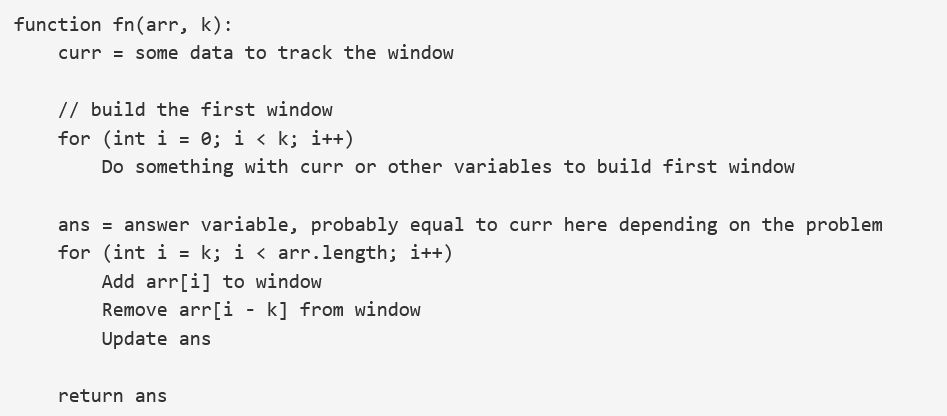



*Example 4: Given an integer array `nums` and an integer `k`, find the sum of the subarray with the largest sum whose length is `k`.*

As we mentioned before, we can build a window of length `k` and then slide it along the array. Add and remove one element at a time to make sure the window stays size `k`. If we are adding the value at `i`, then we need to remove the value at `i - k`.

After we build the first window we initialize our answer to curr to consider the first window's sum.

In [13]:
def find_the_best_subarray(nums, k):
    curr = 0
    for i in range(k):
        curr += nums[i]
        
    ans = curr
    for i in range(k, len(nums)):
        curr += nums[i] - nums[i-k]
        ans = max(ans, curr)
    return ans

numbers = [10,2,-3,9,5,7,-3]
target = 4
find_the_best_subarray(numbers, target)

18